In [1]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [3]:
df = pd.read_csv("Breast_cancer_data.csv", delimiter=",")

In [4]:
df.head() #gives first 5 entries of a dataframe by default

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [6]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [7]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'count')

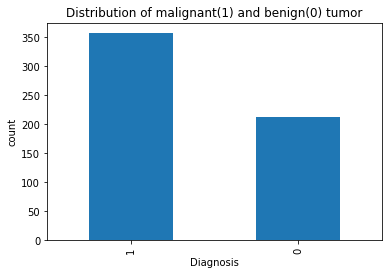

In [9]:
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count")

In [10]:
y_target = df['diagnosis']

In [11]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [12]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

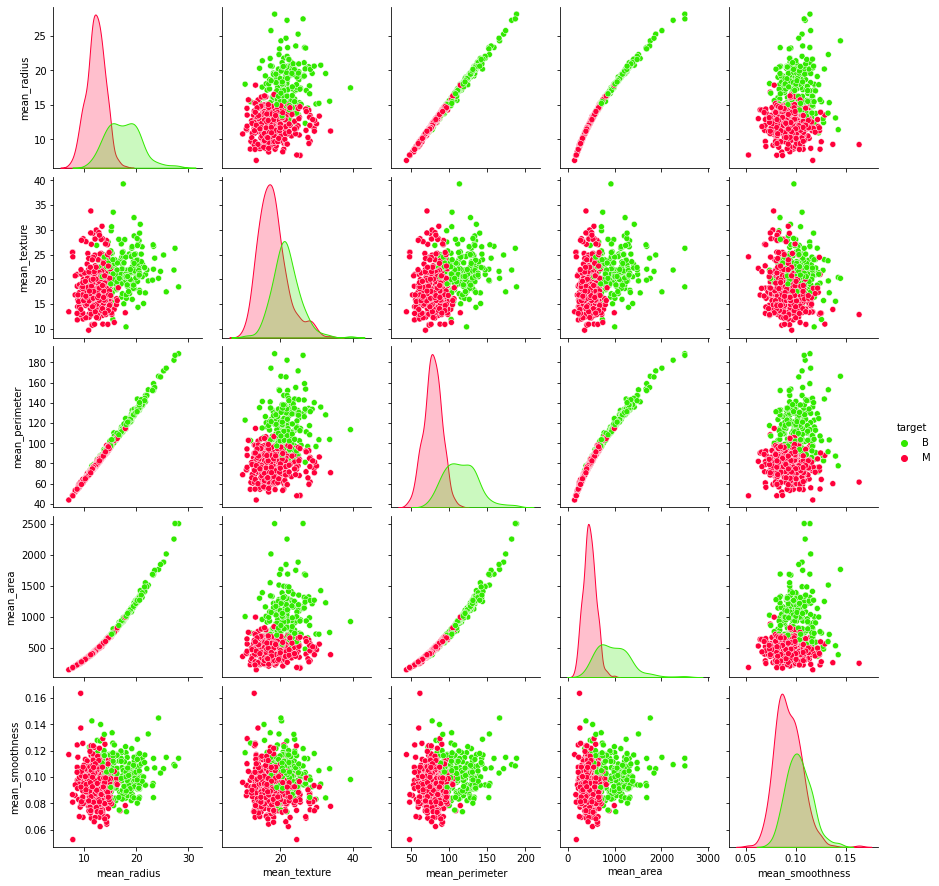

In [13]:
g = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

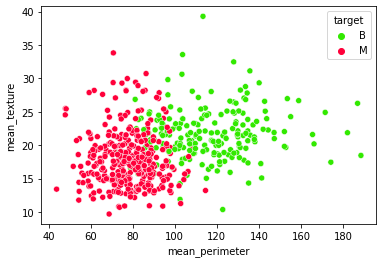

In [14]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target', palette='prism');

In [15]:
features = ['mean_perimeter', 'mean_texture']

In [16]:
X_feature = df[features]

In [17]:
# X_feature = df.drop(['target','diagnosis'], axis = 1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
from mlxtend.plotting import plot_decision_regions

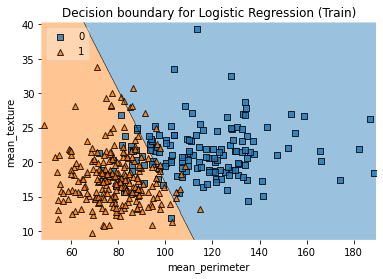

In [25]:
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

In [26]:
y_pred = model.predict(X_test)

In [27]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 91.81286549707602


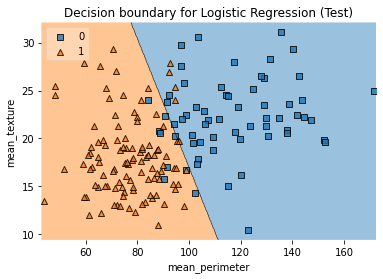

In [28]:
plot_decision_regions(X_test.values, y_test.values, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)

In [31]:
conf_mat

array([[ 54,   9],
       [  5, 103]], dtype=int64)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
clf = KNeighborsClassifier()

In [34]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = clf.predict(X_test)

In [36]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)

Accuracy score using KNN: 92.39766081871345


In [37]:
confusion_matrix(y_test, y_pred)

array([[ 56,   7],
       [  6, 102]], dtype=int64)

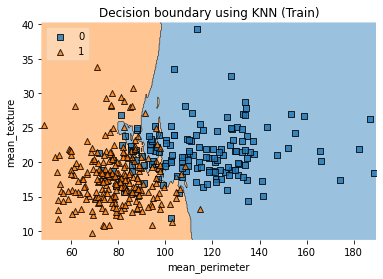

In [38]:
plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

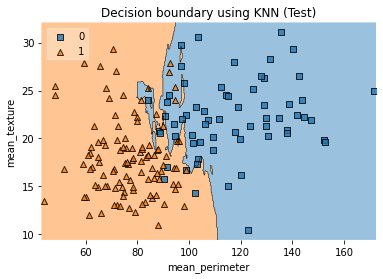

In [39]:
plot_decision_regions(X_test.values, y_test.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");